# Downloading imagery via the Planet API


Planet is an earth observation company based in the San Francisco Bay Area, collecting daily satellite imagery. 

See here for more details: https://www.planet.com/ 

Obviously, you can do quite a lot with such regular revisitation rates, which makes the data useful for monitoring changes from space. 

Thanks to Sara Safavi at Planet for making content open-source, as code here has been adapted from the GitHub associated with a given SciPy 2019 conference presentation.

You can apply for a free API key from Planet using your .edu email address. 

Please sign up now: https://www.planet.com/markets/education-and-research/

It may take a couple of weeks for them to approve your request, so you need to do this ASAP so that this is available to you for use in GGS416.

Thankfully, today we can use a direct tile download which negates the need for us to have an API key.

## Downloading a 4-band PlanetScope asset and associated metadata

Planet refers to their images as 'assets'. 

The constituent components of an 'analytic' 4-band asset include:

- Band 1 = Blue
- Band 2 = Green
- Band 3 = Red
- Band 4 = Near-infrared

The 'analytic' component refers to this imagery being a radiometrically calibrated GeoTiff product suitable for analytic applications.

For more information on Planet 4-band assets, see here:

https://developers.planet.com/docs/data/psscene4band

A GeoTIFF is essentially a normal Tag Image File Format (TIFF) file with a metadata standard which allows embedded georeferencing information.

https://en.wikipedia.org/wiki/GeoTIFF

In [18]:
# Let us download the initial analytic 4-Band PlanetScope tile asset
# UG2TX98suVmmi9q is a tile covering part of the San Francisco Bay
!curl -O -J https://hello.planet.com/data/s/UG2TX98suVmmi9q/download

# And additionally, let us download the XML metadata too
!curl -O -J https://hello.planet.com/data/s/jqDQE8xUHiD511e/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 20190321_174348_0f1a_3B_AnalyticMS.tif: 
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing header
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing header


## Downloading a 3-band PlanetScope asset

The 3-band asset is similar to the 4-band type, only it focuses purely on Red-Green-Blue (RGB) colors (thus, does not have the near-infrared component):

- Band 1 = Blue
- Band 2 = Green
- Band 3 = Red

For more information on Planet 3-band assets, see here:

https://developers.planet.com/docs/data/psscene3band/

In [19]:
# Let us download the 3-Band PlanetScope tile asset
!curl -O -J https://hello.planet.com/data/s/ZWwAg1RcmIN5h9R/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 20160831_180302_0e26_3B_Visual.tif: File 
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing header


## Raster graphics

Now we've downloaded our data assets, we need to check that they can be successfully opened. This requires us to access and display the raster graphics style our data are in. 

Importantly, raster graphics are based on a two-dimensional image represented by a rectangular matrix (thus, a grid of square pixels). 

See here for more information: https://en.wikipedia.org/wiki/Raster_graphics

These graphics can then be interpreted by a computer to display the underlaying data as an image. 

It's important to know the difference between vector and raster graphics. Let's watch the following short video to clarify the difference.


In [20]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/-Fs2t6P5AjY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Rasterio

To interpret our asset data we can use `rasterio` to both read and write geospatial raster data. 

You can think of `rasterio` as standing for Raster Input-Output.

The GeoTIFF standard (and other raster formats) are common for geographic information systems to organize and store gridded, or raster, datasets. We are able to use `rasterio` to read and write these formats and then provide a Python API based on N-D arrays.

An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. Remember we covered an introduction to `numpy` in a previous lecture. Well, `numpy` uses N-D arrays as its basic data structure. `rasterio` heavily uses `numpy` in its operations.   

You can see the GitHub code here: https://github.com/rasterio/rasterio

Or, more usefully, you can access the `rasterio` documentation here: https://rasterio.readthedocs.io/en/latest/

First, we will need to install `rasterio`

In [21]:
# Thankfully we can install rasterio into our virtual environment as follows using the sys package:
import sys
!conda install --yes --prefix {sys.prefix} rasterio

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



Next, we need to load the `rasterio` package into our current environment using the `import` command: 

In [22]:
# Loading a dataset
import rasterio

And now we want to specify the filename for one of the image assets that we have downloaded into our current directory.

In [23]:
# Here we can specify the name of our 3-band analytic image
filename = "20190321_174348_0f1a_3B_AnalyticMS.tif"
filename

'20190321_174348_0f1a_3B_AnalyticMS.tif'

Finally, we can load in our downloaded image using `rasterio`, via the open function.

If this is completed successfully, we should be able to print the `rasterio` object and see the following:

```<open DatasetReader name='20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>```

Now have a go and see what you produce:

In [24]:
my_raster_image = rasterio.open(filename)
print(my_raster_image)

<open DatasetReader name='20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>


In [25]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



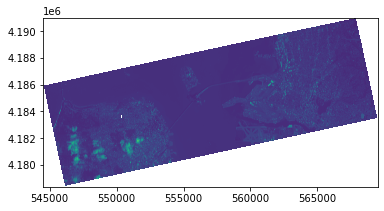

<AxesSubplot:>

In [26]:
from matplotlib import pyplot as plt
from rasterio.plot import show
show(my_raster_image)

## Congratulations!

If your output matches the expected output then you have successfully downloaded an image asset and correctly loaded it into your jupyter session via `rasterio`.

This is where we finish for this tutorial.

However, the next session will pick up here and then begin to explore the metadata for the downloaded imagery. 